# TME 5 : La transformée de Fourier discrète (DFT)

> Consignes: le fichier TME_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en TME5_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !! ...
Pour chaque questions, écrivez des commentaires brefs et concis lorsque demandé dans les cases **Commentaires**.

In [4]:
# Chargement des modules et des données utiles.

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
from pylab import *

# charger les images et les convertir en tableau de int
image_sinus1 = np.array(Image.open("images/sinus1.png"),dtype='int32') 
image_sinus2 = np.array(Image.open("images/sinus2.png"),dtype='int32')
image_sinus3 = np.array(Image.open("images/sinus3.png"),dtype='int32')
image_sinrot = np.array(Image.open("images/sinrot.png"),dtype='int32')
image_gaussienne = np.array(Image.open("images/gaussienne.png"),dtype='int32')
image_rectangle = np.array(Image.open("images/rectangle.png"),dtype='int32')
#image_rotate = np.array(Image.open("images/rotate.png"),dtype='int32')
image_texture1 = np.array(Image.open("images/texture1.png"),dtype='int32')
image_texture2 = np.array(Image.open("images/texture2.png"),dtype='int32')
image_h = np.array(Image.open("images/h.png"),dtype='int32')
image_pulse = np.array(Image.open("images/pulse.png"),dtype='int32')
image_passe_bas = np.array(Image.open("images/passe_bas.png"),dtype='int32')
image_passe_haut = np.array(Image.open("images/passe_haut.png"),dtype='int32')
image_passe_bande = np.array(Image.open("images/passe_bande.png"),dtype='int32')


def affichage_14(affichages,titres=None):
    # effectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    # paramètres :
    #  - liste des affichages (entre 1 et 4)
    #  - liste des titres (entre 1 et 4, autant que de affichages) Optionnelle
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plt.plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

    
def module_affichage(module):
    # permet de transformer un module de DFT en une version jolie à afficher
    module = np.array(module, dtype='float32')
    ind_max = np.where(module == np.max(module.flatten()))
    module[ind_max]=0.0
    module[ind_max]=np.max(module.flatten())
    module = sqrt(module)
    return sqrt(module)

### Exercice 1 — DFT d’une sinusoïde 2D

Cet exercice est le prolongement de l’exercice 2 du TD 5. On s'intéresse ici au résultat de la transformée de Fourier discrète (rapide) des images ```sinus1.png```, ```sinus2.png``` et ```sinus3.png```.

**Note** : pour afficher une série d'images et/ou de courbes (entre 1 et 4) avec un titre (optionnel), utilisez la fonction ```affichage_14()```. Spécifiez à cette fonction une liste d'images (tableau numpy 2D) et/ou de courbes (tableau numpy 1D) et la liste (optionnelle) correspondante des titres à afficher comme ci-dessous :

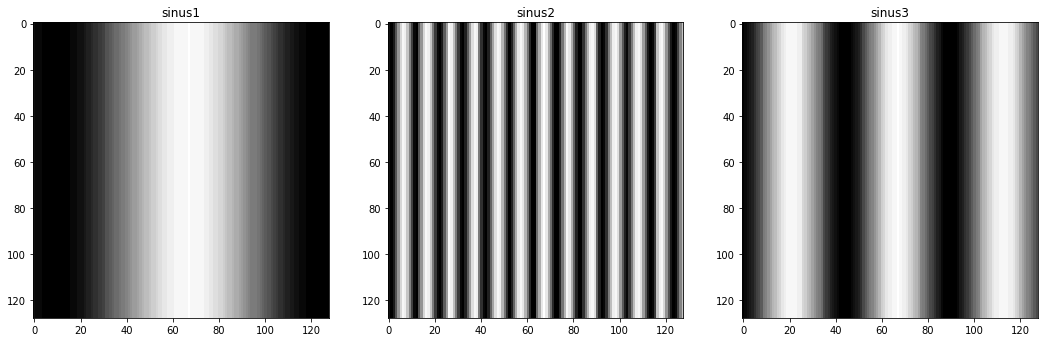

In [5]:
affichage_14([image_sinus1,image_sinus2,image_sinus3],['sinus1','sinus2','sinus3'])

# Commentaire
Les images représentent des sinus selon l'axe x et sont constantes selon l'axe y, plus la période du signal est grande, plus la fréquence est petite ( f=1/T)

### Question 1

Calcul de la DFT de l'image ```sinus1.png``` sous la forme module/phase.

1. Caculez la DFT non centrée de sinus1.png avec la fonction ```fft2()```
2. Visualisez les parties réelle et imaginaire de la DFT non centrées avec les fonctions ```real()``` et ```imag()``` 
3. Centrez la DFT avec ```fftshift()``` et visualiser le module et la phase de la DFT centrée avec les fonctions ```abs()``` et ```arctan2()```


**Note:** Par la suite utilisez la fonction ```module_affichage()``` pour une meilleure visualisation des modules (uniquement). Cette fonction prend un module de DFT centrée et retourne une version du module qui s'affiche mieux. En effet sinon les valeurs hautes du modules rendent invisibles les valeurs faibles sur l'image


### **Commentaires :**
(voir https://rmarkdown.rstudio.com/authoring_basics.html pour un rapide résumé du langage Markdown)

Vos commentaires ici, ***Markdown*** et formules LaTeX possibles : $z=x+iy$, ...



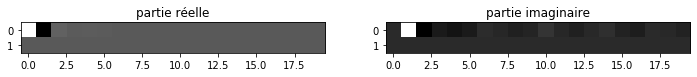

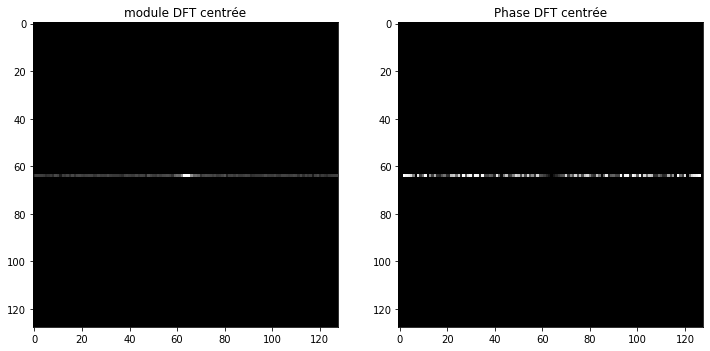

In [6]:
# DFT sinus1
fft2_sinus1 = np.fft.fft2(image_sinus1)


# partie réelle et imaginaire 
real_sinus1 = np.real(fft2_sinus1)
imag_sinus1 = np.imag(fft2_sinus1)

# module et phase
fft2_sinus1_c = np.fft.fftshift(fft2_sinus1)
module_sinus1 = np.sqrt(np.fft.fftshift(imag_sinus1)**2+np.fft.fftshift(real_sinus1)**2)
phase_sinus1 = np.arctan2(np.abs(np.fft.fftshift(imag_sinus1)),np.abs(np.fft.fftshift(real_sinus1)))

# visualisation
affichage_14([real_sinus1[0:2,0:20],imag_sinus1[0:2,0:20]],['partie réelle','partie imaginaire'])
affichage_14([module_affichage(module_sinus1),phase_sinus1],['module DFT centrée','Phase DFT centrée'])



# Commentaires:
la transformée de Fourier met en évidence les caractéristiques fréquentielles d'une texture. Le spectre permet de rendre compte de la distribution énergétique de l’image, de respecter aussi bien la périodicité que l’orientation des motifs de l’image 

### Commentaires



### Question 2 :

On va s'intéresser au module de la DFT centrée. **Note:** N'oubliez pas de toujours utiliser ```module_affichage(image_module)``` pour afficher les images modules à l'écran avec la fonction ```affichage_14()```.

1. Codez une fonction ```module_fft_c()``` qui renvoie le module de la DFT centrée d'une image.
2. Remarquez l'emplacement des coefficients non nuls dans l'image du module de la DFT centrée de sinus1.png. Où sont-ils situés ?  Extrayez ces coefficient et tracez les avec la fonction ```affichage_14()```. **Note :** Vous pouvez extraires les coefficients en prenant la ligne correspondante dans l'image de module ou bien en prenant simplement les coefficients non nuls de l'image avec ```coeffs = image[image>0]```
3. Répétez ces opérations sur les images sinus2.png et sinus3.png : affichez les images des modules et tracez les coefficients non nuls

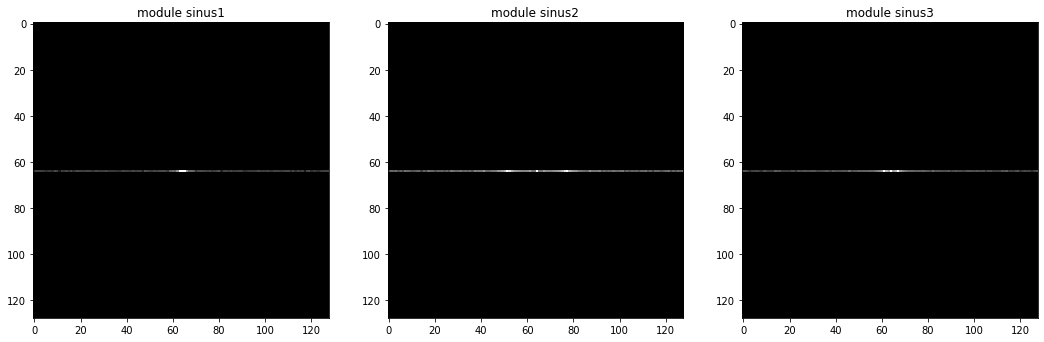

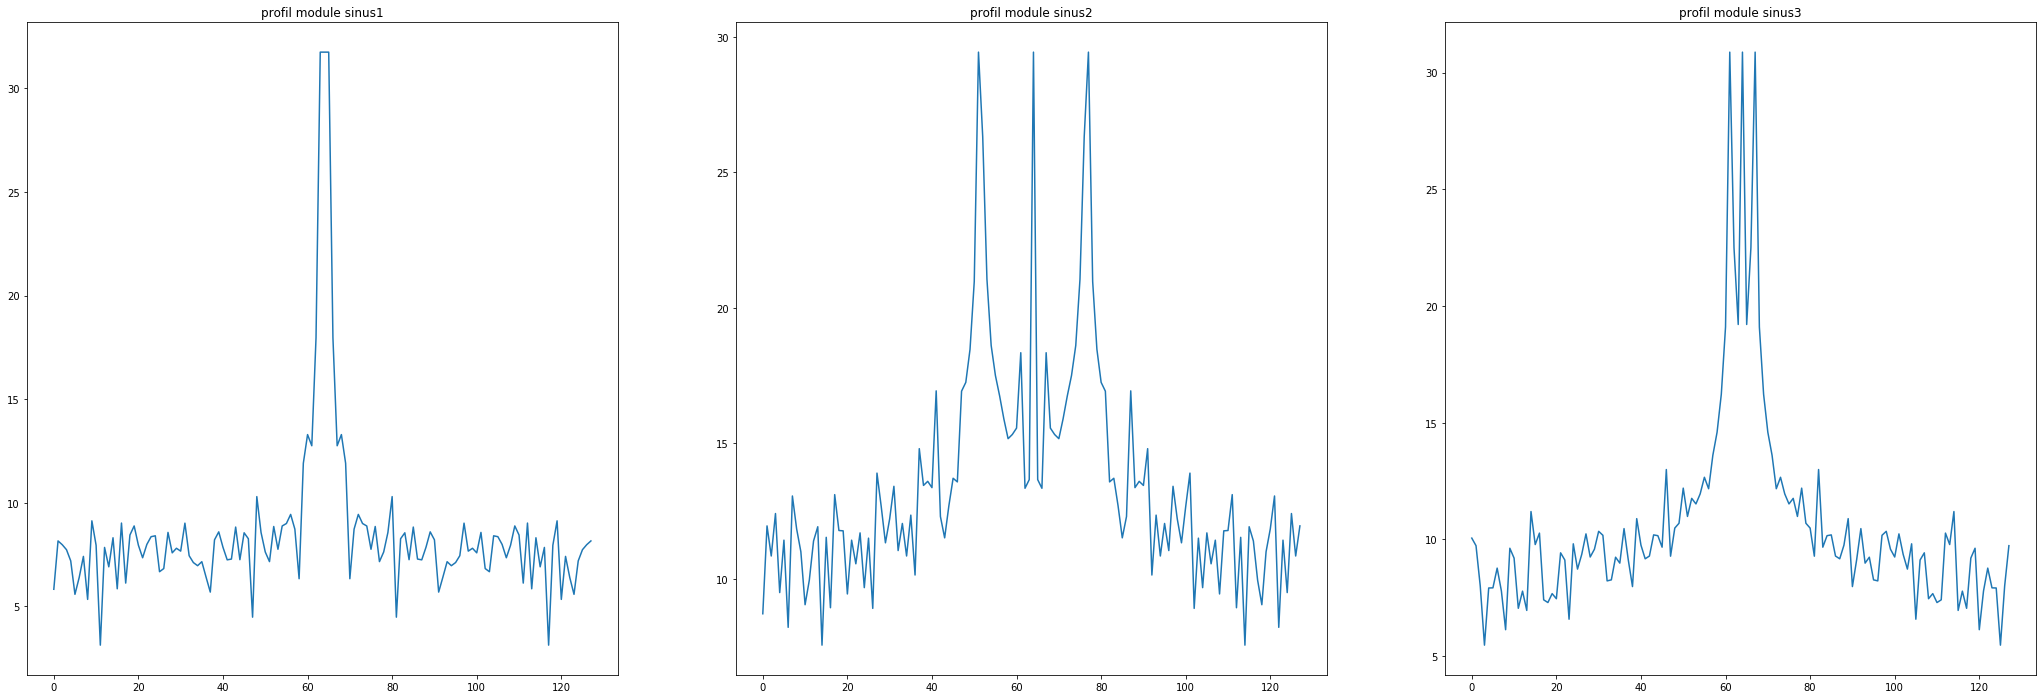

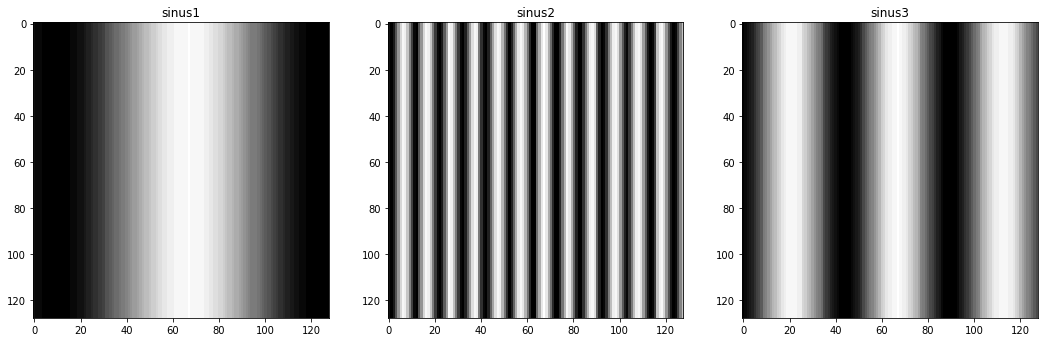

In [7]:
def module_fft_c(image):
    img = np.fft.fft2(image)
    return np.sqrt(np.fft.fftshift(np.imag(img))**2+np.fft.fftshift(np.real(img))**2)

module_sinus2 = module_fft_c(image_sinus2)
module_sinus3 = module_fft_c(image_sinus3)

module_sinus1 = module_fft_c(image_sinus1)


affichage_14( [module_affichage(module_sinus1),module_affichage(module_sinus2),module_affichage(module_sinus3)], ['module sinus1','module sinus2','module sinus3'])
#affichage_14( [module_affichage(module_sinus1[module_sinus1>0])], ['profil module sinus1'])

                                 
affichage_14([module_affichage(module_sinus1[module_sinus1>0]),module_affichage(module_sinus2[module_sinus2>0]),module_affichage(module_sinus3[module_sinus3>0])], ['profil module sinus1','profil module sinus2','profil module sinus3'])

affichage_14([image_sinus1,image_sinus2,image_sinus3],["sinus1","sinus2","sinus3"])

### Commentaires:

On remarque sur l'image du module de la DFT centrée de sinus1.png, que les coefficients non nuls sont regroupés sur la ligne du milieu. Les coefficients les plus grands étant autour du point central. C'est normal, car l'image est centrée de telle sorte que l'on obtienne un regroupement des basses fréquences au centre de l'image.

On remarque que le module du sinus1 ne possède qu'un unique "point blanc" au centre. Ce point blanc représente la fréquence fondamentale du sinus. C'est également la moyenne de l'intensité de l'image.
#### Remarque: 
les points blancs indiquent les fréquences des sinusoîdes composant l'image


Pour le sinus2, on observe 3 points blanc distincts sur l'image du module: Le point central répresente toujours la fréquence fondamentale, les points de part et d'autre de ce point central répresentent les fréquences des sinusoïdes associées à l'image.

La différence entres les affichages des modules des sinus 2 et 3 est sur l'espacement des points blancs observés. En effet, les points sont plus espacés sur le module du sinus2 que sur celui du sinus3. Cela indique que les fréquences des sinusoïdes de sinus2 sont plus hautes que celles de sinus3. ( On sait que plus les points sont espacés plus la fréquence est grande donc plus la période est petite, ce qui est en adéquation avec nos images)

### Conclusion
les piques observés vont correspondre aux représentations des sinusoïdes de chaque sinus, ie la composition fréquentielle d'une image. Le point central représentant la moyenne de l'intensité de l'image et les deux autres points représentant la fréquence du sinus
    


## Exercice 2 : Quelques DFT d’images simples

1. **DFT d'une sinusoïde diagonale:** Affichez l'image `sinrot.png` ainsi que le module de sa DFT centrée et commentez.

2. **DFT d'une gaussienne:** Affichez l'image `gaussienne.png` à côté du module de sa DFT centrée.  
Puis choisissez la ligne ou la colonne du milieu dans les deux images et comparez leurs profils. Commentez.

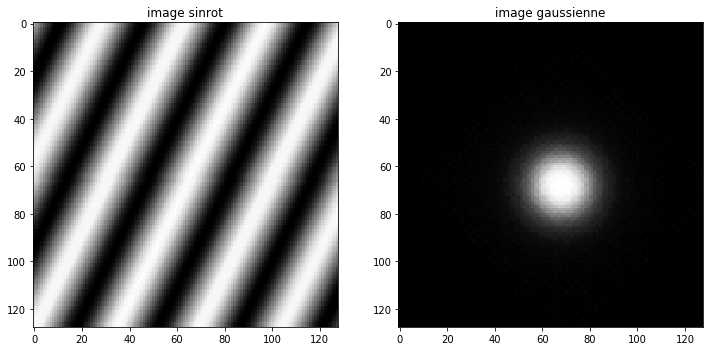

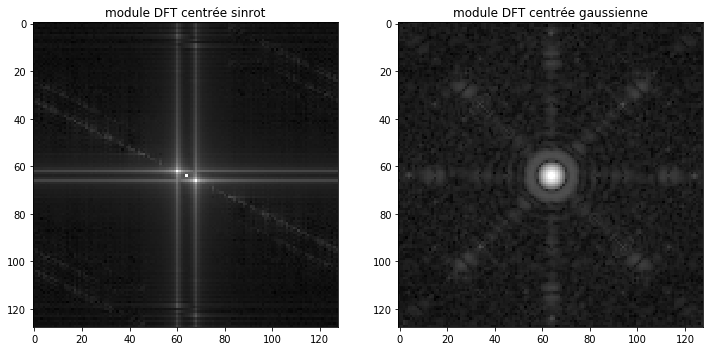

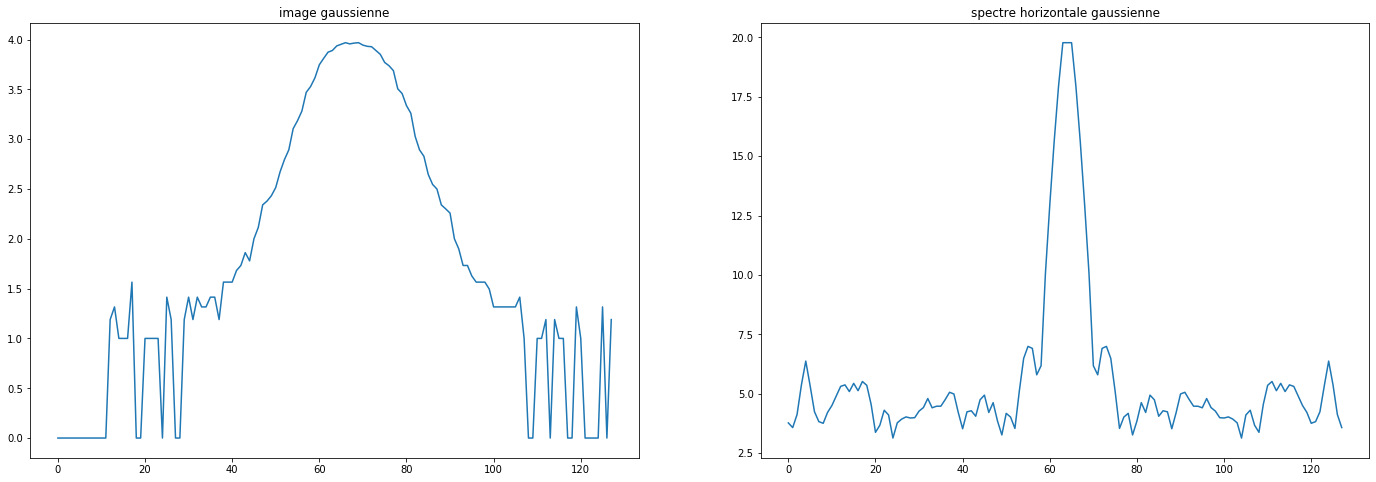

In [12]:
# Code à compléter

module_fft_sinrot = module_fft_c(image_sinrot)
affichage_14( [image_sinrot,image_gaussienne ], ['image sinrot', 'image gaussienne'])

module_fft_gaussienne = module_fft_c(image_gaussienne)
affichage_14( [module_affichage(module_fft_sinrot), module_affichage(module_fft_gaussienne)], ['module DFT centrée sinrot', 'module DFT centrée gaussienne'])

n = int(module_fft_gaussienne.shape[0]/2)
affichage_14( [module_affichage(image_gaussienne[n]),module_affichage(module_fft_gaussienne[n])], ['image gaussienne', 'spectre horizontale gaussienne'])

### Commentaires:

#### DFT d'une sinusoïde diagonale
On remarque que le signal de l'image sinrot varie dans les deux directions ( x et y ), sur le module on peut se rendre qu'on obtient 9 points en plus du point central ( les points d'intersection des lignes claires). Il représentent la périodicité selon le sens horizontal, vertical et diagonal. Les autres points d'intensités plus faibles sont dus à des effets de bord. Nous observons cependant une concentration d'energie autour de la diagonale, ce qui nous renseigne sur la direction principale de l'image.


#### DFT d'une gaussienne
Dans le specte, on retrouve une concentration d'énergie autour des axes principaux ( horizintal, diagonal, vertical) car l'image de la gaussiente varie selon les 3 directions
De même la ligne du mileu du spectre ne nous renseigne pas sur tous les pics présents dans l'image car il exclue les diagonaux

#### Comparaison colonne du milieu dans la gaussienne et son spectre
Nous remarquons que les deux ont une allure de fonction gaussienne en une dimension, elles ont presque la même moyenne mais ont des variances différentes

### Conclusion
La rotation de la sinusoîde induit la rotation de sa DFT centrée
La DFT centrée de l'image gaussienne donne aussi une image gaussienne ( modulo des effets de bord )


## Exercice 3 : Propriétés de la DFT

Cet exercice se propose de mettre en avant certaines propriétés de la DFT :

1. Observer et interprétez le module de la DFT centrée de l’image rectangle.png. On tracera le profil de niveaux de gris sur la ligne 65.
2. Observez et interprétez le module de la DFT centrée de l’image rotate.png. Cette image correspond à la précédente, après rotation de 30 degrés.
3. Effectuez la somme des deux images précédentes en utilisant la fonction ```somme_images()```. Observez et interprétez le module de la DFT centrée de l’image résultat.


In [13]:
from scipy.misc import imresize

def somme_images(img1,img2):
    # convert to float
    img1 = np.array(img1, dtype='float32')
    img2 = np.array(img2, dtype='float32')
    # rescale :
    img1 /= np.sum(img1)
    img2 /= np.sum(img2)
    return img1 + img2

module_fft_rectangle = module_fft_c(image_rectangle)
affichage_14( [image_rectangle, module_affichage(module_fft_rectangle),image_rectangle[65]], ['image rectangle', 'module DFT centrée rectangle','spectre ligne 65 DFT rectangle'])

module_fft_rotate = module_fft_c(image_rotate)
affichage_14( [image_rotate, module_affichage(module_fft_rotate)], ['image rotate', 'module DFT centrée rotate'])

# Redimensionnement de l'image rotate
img_rotate = imresize(image_rotate, 300/128)

image_somme = somme_images(image_rectangle,img_rotate)
module_fft_somme = module_fft_c(image_somme)
affichage_14( [image_somme, module_affichage(module_fft_somme)], ['image somme', 'module DFT centrée somme'])

ImportError: cannot import name 'imresize'

### **Commentaires :**

#### Image rectangle.png:
    L'image rectangle.png représente une carré blanc sur un fond noir. Les lignes de contour blanc sont très marquées. Cette démarcation est représentée sur le spectre du module par une concentration de points blancs sur les axes centraux: ligne verticale représentant les contours horizontaux du carré, horizontale pour les contours verticaux.
    
#### Image rotate.png:
    L'image rotate.png correspond à une rotation de 30° de l'image rectangle.png. Les lignes diagonales observées sur le spectre du module correspondent perpendiculairement aux contours de l'image. De plus, les contours de l'image rotate ne sont plus aussi nets que ceux de l'image rectangle. Ce flou est alors visible sur le spectre du module comme les diagonales de moindre intensités présentent parallèlement aux diagonales centrales. 
    
#### Image somme:
    L'image somme est constitué de la superposition des deux images précédemment étudiée. La transformée de Fourier possédant une propriété de linéarité, la somme des modules de deux images va correspondre au module de la somme. Ainsi, le spectre du module de la somme des images rectangle et somme correspond bien à la combinaison des spectres de modules respectifs de ces images.

## Exercice 4 : Compréhension de spectres

Affichez les images ```texture1.png```, ```texture2.png```, ```h.png``` et leurs DFT. Commentez les DFT.

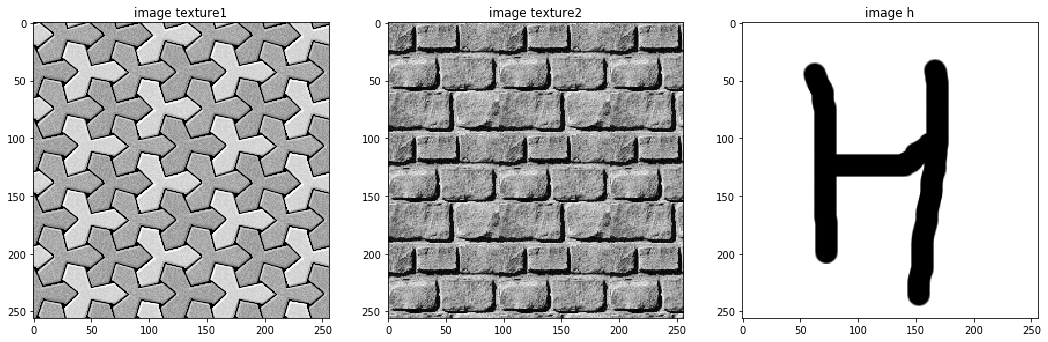

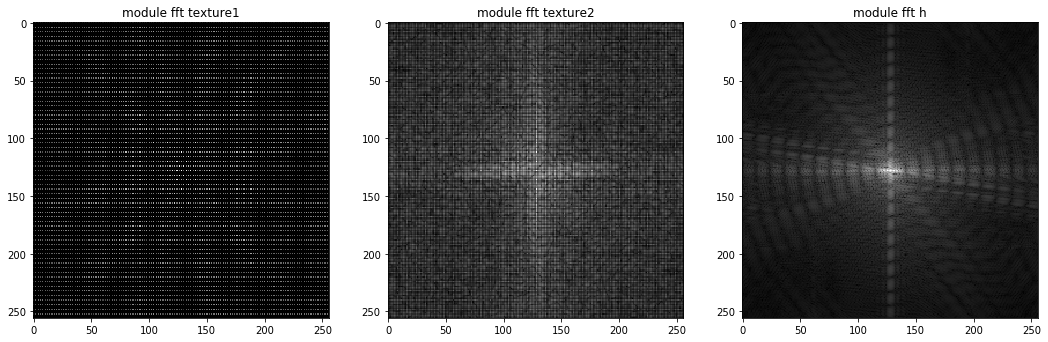

In [23]:
affichage_14( [image_texture1, image_texture2, image_h], ['image texture1', 'image texture2','image h'])
module_fft_texture1 = module_fft_c(image_texture1)
module_fft_texture2 = module_fft_c(image_texture2)
module_fft_h = module_fft_c(image_h)
affichage_14( [module_affichage(module_fft_texture1), module_affichage(module_fft_texture2), module_affichage(module_fft_h)], ['module fft texture1', 'module fft texture2','module fft h'])

### **Commentaires :**

#### texture 1:
    L'image texture1 est une image représentant une alternance d'un même motif de couleur légérement différente ( peu de différence d'intensité) à tendance de gris. Il y a une variation du signal selon les 3 axes ( horizontal, digonal et vertical). Cela se traduit sur le spectre du module par une diffusion de points représentant la répartition de chaque motif. Comme la texture de l'image reste homogène, la DFT est homogène aussi.
    
#### texture 2:
    L'image texture2 représente des briques disposées horizontalement. Les différentes briques sont distinguées les unes des autres par les lignes noires. Ces différentes lignes horizontales et verticales sont représentées sur le module. En effet, les lignes horizontales fortement contrastées sur l'image apparaissent perpendiculairement sur le modules sur l'axe vertical central. Inversement pour les lignes verticales. Etant donné les différences d'intensité entre les briques, l'image n'est pas homogène et donc la DFT non plus, ce qui se traduit par une croix lumineuse au centre. Les périodicités verticales et horizontales des lignes se retrouvent dans l’espacement régulier des points de la DFT
    
#### image h:
    Comme prévu, les lignes fortement contrastée dans l'image h (les traits noirs de la lettre) sont très fortement présentes dans le spectre du module. En effet, on observe sur le spectre du module une concentration autour de l'axe vertical (représentant la barre horizontale du H) et de l'axe horizontal (les deux barres verticales de la lettre). Si l'on résonne en terme de somme des images qui compose le H, on pourrait se ramener à deux rectangles verticaux et un rectangle horizontal. D'après le cours, on peut faire la somme des DFTs de ces trois images pour obtenir la DFT finale ( DFT(image1+image2)=DFT(image1)+DFT(image2)) la DFT de H est donc la somme de 3 croix centrées

## Exercice 5 : Filtrage dans le domaine fréquentiel


1. Observez l’image ```pulse.png```. À quel signal (bidimensionnel) correspond-elle ? Observez le spectre de sa DFT centrée. Interprétez le résultat.
2. Observez l’image ```passe_bas.png```. Cette image correspond en fait a la réponse fréquentielle d’un filtre passe-bas idéal ```PB```. À quoi le voit-on ? Tracez ce profil et celui de la DFT (même colonne) précédente.
3. Soit ```A = image_pulse```. Calculez $DFT(A) \times PB$ et interpréter le résultat obtenu en affichant le module de cette image.
4. Calculez la DFT inverse (fonction ```ifft2()```) en utilisant l'image  $DFT(A) \times PB$  afin d’obtenir l’image reconstruite ```A′```. Visualisez et interprétez le module de cette image ainsi que la courbe de profil obtenue à partir d'une de ses lignes. Commentez.
5. Effectuer les étapes 1, 2 et 3 avec les filtres suivants : ```passe_haut.png``` et ```passe_bande.png```, respectivement les réponses fréquentielle d’un filtre passe-haut ```PH``` et d’un filtre passe-bande ```PB```.

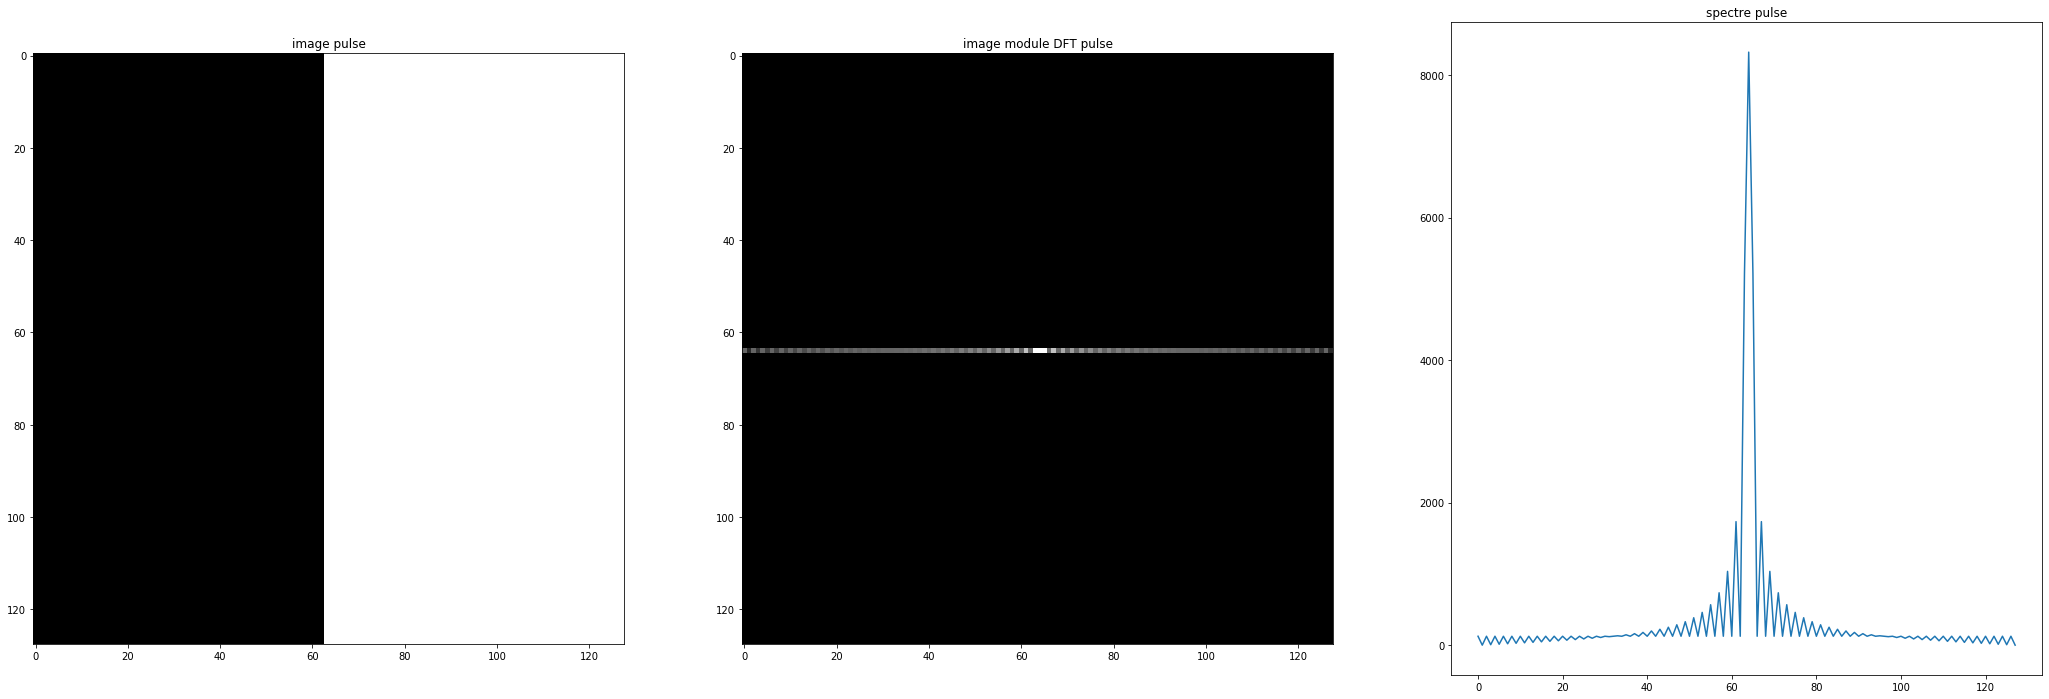

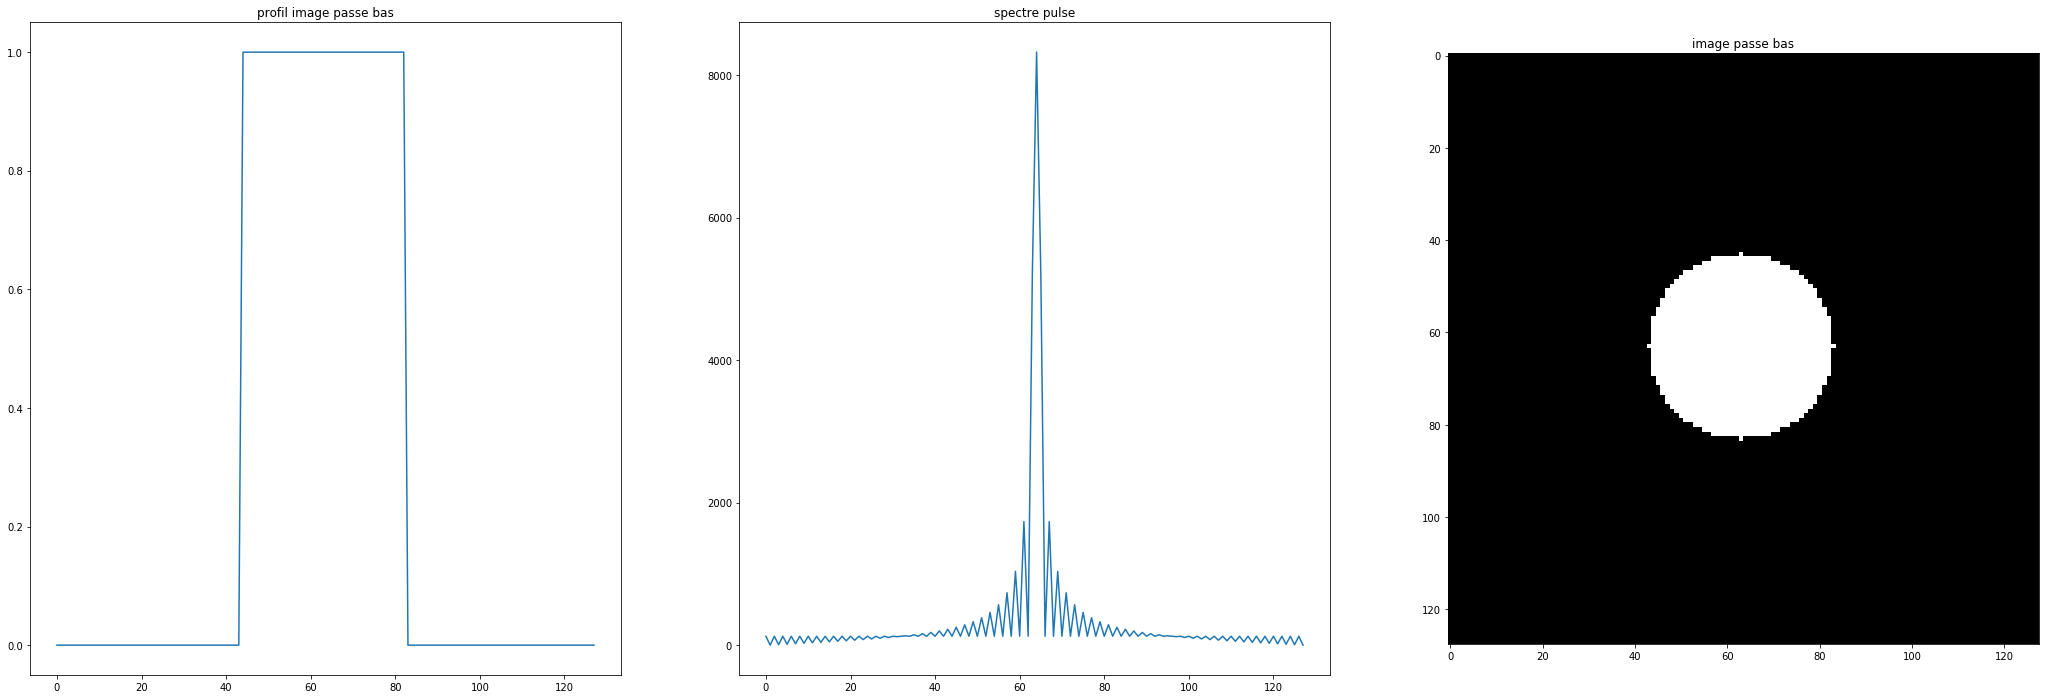

/usr/lib/python3/dist-packages/ipykernel_launcher.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/lib/python3/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in sqrt


TypeError: Image data of dtype complex128 cannot be converted to float

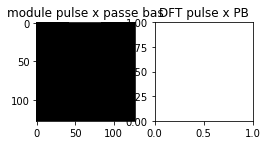

In [14]:

module_fft_pulse = module_fft_c(image_pulse)
affichage_14( [image_pulse, module_affichage(module_fft_pulse), module_fft_pulse[module_fft_pulse>0]], ['image pulse', 'image module DFT pulse', 'spectre pulse'])

# passe bas
affichage_14([image_passe_bas[65],module_fft_pulse[module_fft_pulse>0],image_passe_bas],['profil image passe bas','spectre pulse','image passe bas'])

#votre_code
image_pb_filtre = np.dot(np.fft.ifft2(image_pulse),image_passe_bas)
affichage_14([module_affichage(image_pb_filtre), image_pb_filtre, image_pb_filtre[65]],['module pulse x passe bas', 'DFT pulse x PB', 'profil DFT pulse x PB'])

    
# passe haut
affichage_14([image_passe_haut[65], module_fft_pulse[module_fft_pulse>0],image_passe_haut],['profil image passe haut','spectre pulse','image passe haut'])

#votre_code
image_ph_filtre = np.dot(np.fft.ifft2(image_pulse),image_passe_haut)
affichage_14([module_affichage(image_ph_filtre),image_ph_filtre, image_ph_filtre[65]],['module pulse x passe haut', 'DFT pulse x PH', 'profil DFT pulse x PH'])


# passe bande
affichage_14([image_passe_bande[65], module_fft_pulse[module_fft_pulse>0], image_passe_bande],['profil image passe bande','spectre pulse','image passe bande'])

#votre_code
image_pb_filtre = np.dot(np.fft.ifft2(image_pulse),image_passe_bande)
affichage_14([module_affichage(image_pb_filtre), image_pb_filtre, image_pb_filtre[65]],['module pulse x passe bande', 'DFT pulse x PB', 'profil DFT pulse x PB'])



### **Commentaires :**

#### Question 1: 

       L'image pulse.png correspond à un signal (échelon) s(x,y) = 0   si x<65 
                                                                   255 sinon
                                                      
   On observe que le spectre de pulse correspond au profil d'un sinus cardinal. C'est normal car la transformée de Fourier d'une porte est un sinus cardinal. Etant donné que notre échelon est une porte shiftée et que les valeurs des pixels n'ont pas d'incidence sur le module de la DFT (elles ont une incidence sur la phase uniquement),on observe donc une forte ressemblance entre les deux profils.
   
   
#### Question 2: